# Problem Formulation
## Define the problem
- Because of the rise of social networks and their involvement in other spheres such as politics, false information on the Internet has produced a slew of social issues.

- We are going to predict if a specific reddit post is fake news or not, by looking at its title.

## What is the input?
The input is the text feature. it contains various forms of words.

## What is the output?
If a specific reddit post is fake news or not. In the dataset, the label column is output.

## What data mining function is required?
In this case, it will be binary Classification that separates data points into different classes (fake or not / 0 or 1) which If a specific reddit post is fake news or not.
## What could be the challenges?
- The data contains various forms of words.

- The datasets have outliers values.

- predict a specific reddit post is fake news or not, by looking at its title.

## What is the impact?
When I create a new system and give it a Feature, it can decide whether If a specific reddit post is fake news or not.

## What is an ideal solution?
According to my subsequent attempts, Bayesian Search and Random Forest Classifier with Cross Validation. is the best approach because it provides me the highest kaggle score.

The Bayesian Search use of intelligence to pick the next set of hyperparameters which will improve the model performance.

# Implementation
## Steps
## What preprocessing steps are used?

- Remove outliers.

- Cleaning the text.

- Compute the frequency of the words.

## What is the experimental protocol used and how was it carried out?

- Read the data using the function "read_csv"

- Cleaning the text by I'll remove any html tags, digits, single letter chars, stopwords, punctuation, the noise data, convert
all whitespaces to single wspace and make stemming.

- I will split the data to use Holdout method is split the training dataset to training data and validation data using "train_test_split".

- I use validation and Cross validation for training the model well.

- Determine the optimal values for a given model by using GridSearch, RandomSearch and BayesianSearch.

- I use Xgboost, Random Forest and Logistic Regression to fit the model.

### Important Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string as st#Common string operations
import re#Regular expression operations
import nltk#Natural Language Toolkit
from nltk.tokenize import word_tokenize#Tokenizers divide strings into lists of substrings
from nltk.corpus import stopwords#remove stop words
from sklearn.pipeline import Pipeline#create pipline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV#model tuning
from xgboost import XGBClassifier#XGBClassifier model for classification
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt #to visualization 
import seaborn as sns#to visualization
from sklearn.model_selection import train_test_split#split text into train and test 
from sklearn.feature_extraction.text import TfidfVectorizer#vectorize text into numeric useing Tfidf
import warnings #handling warning 
warnings.filterwarnings('ignore')
# Provides train/test indices to split data into train/test sets
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from skopt import BayesSearchCV 

In [3]:
nltk.download('punkt')#download punkt pakages from nltk library
nltk.download('stopwords')#download stopwords pakages from nltk library
nltk.download('wordnet')#download wordnet pakages from nltk library

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# reading the training dataset 
df_train = pd.read_csv('xy_train.csv') 
# reading the testing dataset 
df_test = pd.read_csv('x_test.csv') 

In [5]:
#show heading of columns in trainig data
df_train.head()

,id,text,label
0,265723,A group of friends began to volunteer at a hom...,0
1,284269,British Prime Minister @Theresa_May on Nerve A...,0
2,207715,"In 1961, Goodyear released a kit that allows P...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0


In [6]:
df_test

,id,text
0,0,stargazer
1,1,yeah
2,2,PD: Phoenix car thief gets instructions from Y...
3,3,"As Trump Accuses Iran, He Has One Problem: His..."
4,4,"""Believers"" - Hezbollah 2011"
...,...,...
59146,59146,Bicycle taxi drivers of New Delhi
59147,59147,Trump blows up GOP's formula for winning House...
59148,59148,Napoleon returns from his exile on the island ...
59149,59149,Deep down he always wanted to be a ballet dancer


In [7]:
#check the value counts of each label
df_train.label.value_counts()

0    32172
1    27596
2      232
Name: label, dtype: int64

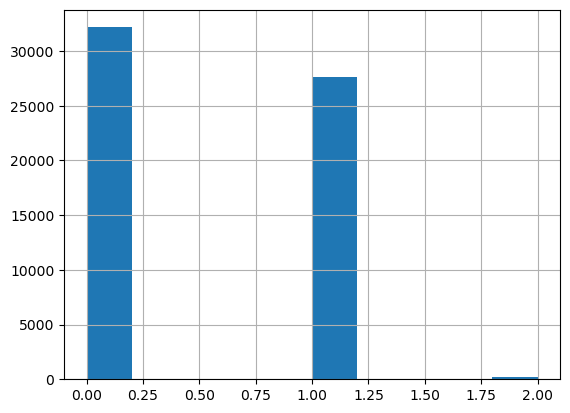

In [8]:
#distribution of the output 
df_train['label'].hist();

In [9]:
#drop row of label equal 2 and take a copy of the data
df_train = df_train[df_train.label!= 2]

In [10]:
#label of our data 
y_train=df_train['label']

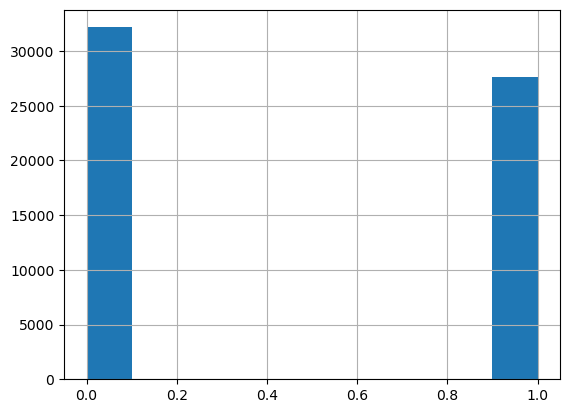

In [11]:
#distribution of the output 
y_train.hist();

In [12]:
# anything missing?
df_train.isnull().sum().sort_values(ascending=False)

id       0
text     0
label    0
dtype: int64

In [13]:
#check if there is any duplication in the data
print(df_train.duplicated().sum())

0


## Cleaning and preprocessing

Create Function for remove any html tags, remove any digits, remove any single letter chars, convert all whitespaces to single wspace, make all lowercase words, remove any stopwords, remove any punctuation and make stemming. remove the noise data in training data.

In [36]:
# for stemming algorithm
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))


# Make Function to clean text
def clean_text(text, for_embedding=True):
    """ steps:
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
        - return the clean text
    """
    re_wspace = re.compile(r"\s+", re.IGNORECASE)
    re_tags = re.compile(r"<[^>]+>")
    re_ASII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    re_single_char = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        re_ASII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        re_single_char = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(re_tags, " ", text)
    text = re.sub(re_ASII, " ", text)
    text = re.sub(re_single_char, " ", text)
    text = re.sub(re_wspace, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

##### Applying the cleaning function to the train and test data

In [37]:
%%time
# Clean texts training data 
df_train["text_clean"] = df_train.loc[df_train["text"].str.len() > 0, "text"] # get all text data the length it greater than 0 in training data
# call clean_text of method to apply it on text_clean feature in traing data
df_train["text_clean"] = df_train["text_clean"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x  # check if text is instance of string
) 

CPU times: total: 18.5 s
Wall time: 18.6 s


In [38]:
# show the training data
df_train

,id,text,label,text_clean
0,265723,A group of friends began to volunteer at a hom...,0,group friend began volunt homeless shelter nei...
1,284269,British Prime Minister @Theresa_May on Nerve A...,0,british prime minist theresa may nerv attack f...
2,207715,"In 1961, Goodyear released a kit that allows P...",0,goodyear releas kit allow ps brought heel http...
3,551106,"Happy Birthday, Bob Barker! The Price Is Right...",0,happi birthday bob barker price right host lik...
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0,obama nation innoc cop unarm young black men d...
...,...,...,...,...
59995,70046,Finish Sniper Simo H盲yh盲 during the invasion o...,0,finish sniper simo yh invas finland ussr color
59996,189377,Nigerian Prince Scam took $110K from Kansas ma...,1,nigerian princ scam took kansa man year later ...
59997,93486,Is It Safe To Smoke Marijuana During Pregnancy...,0,safe smoke marijuana pregnanc surpris answer
59998,140950,Julius Caesar upon realizing that everyone in ...,0,julius caesar upon realiz everyon room knife e...


In [39]:
%%time
# Clean texts testing data
df_test["text_clean"] = df_test.loc[df_test["text"].str.len() > 0, "text"] # get all text data the length it greater than 0 in testing data
# call clean_text of method to apply it on text_clean feature in testing data
df_test["text_clean"] = df_test["text_clean"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x  # check if text is instance of string
)

CPU times: total: 10.4 s
Wall time: 10.4 s


In [40]:
# show the testing data
df_test

,id,text,text_clean
0,0,stargazer,stargaz
1,1,yeah,yeah
2,2,PD: Phoenix car thief gets instructions from Y...,pd phoenix car thief get instruct youtub video
3,3,"As Trump Accuses Iran, He Has One Problem: His...",trump accus iran one problem credibl
4,4,"""Believers"" - Hezbollah 2011",believ hezbollah
...,...,...,...
59146,59146,Bicycle taxi drivers of New Delhi,bicycl taxi driver new delhi
59147,59147,Trump blows up GOP's formula for winning House...,trump blow gop formula win hous race
59148,59148,Napoleon returns from his exile on the island ...,napoleon return exil island elba march colouris
59149,59149,Deep down he always wanted to be a ballet dancer,deep alway want ballet dancer


In [41]:
# set the tect_clean feature and label to values in training data 
X = df_train["text_clean"]
Y = df_train["label"]

### Functions
I'll do functions because I'll be using them a lot and don't want to repeat the code. such as create pipline and set multiple classifiers and fit them, predict the testing set and record the probability of prediction in csv file.

In [20]:
# Make a Function to Pipeline vectorizer and my_classifier
# combine the vectorizer with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters

def create_fit_pipeline(my_classifier):
  full_pipeline = Pipeline(
      steps=[
          ("vectorizer", TfidfVectorizer(norm="l2")), 
          ('my_classifier', my_classifier)
      ]
  )
  # The pipeline object can be used like any sk-learn model and training it 
  full_pipeline = full_pipeline.fit(X, Y)
  return full_pipeline

In [21]:
# Make Funiction to prediction the pipeline
def predict_pipeline(full_pipeline):
  # prediction the df_test
  y_pred = full_pipeline.predict(df_test)
  # Show unique and count values
  return pd.DataFrame(y_pred).value_counts()

In [22]:
# Make a Function for predict the testing data and save it in the csv file
def predict_save_csv(search_model, classifier_name):
  submission = pd.DataFrame()
  submission['id'] = df_test.index
  submission['label'] = search_model.predict_proba(df_test.text_clean)[:,1]
  file_name = 'Compition_3_' + classifier_name + '.csv'
  submission.to_csv(file_name, index=False)

In [23]:
# Further split the original training set to a train and a validation set
X_train2, X_val, y_train2, y_val = train_test_split(
    X, Y, train_size = 0.8, stratify = Y, random_state = 42)

# Create a list where train data indices are -1 and validation data indices are 0
# X_train2 (new training set), X_train
split_index = [-1 if x in X_train2.index else 0 for x in X.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

### Tuning Methods
Tuning Methods (Grid Search, Random Search, Bayisen Search) are available in the scikit-learn class model_selection. It can be initiated by creating an object.

- Parameters of Tuning Methods (Grid Search, Random Search, Bayisen Search) method are:

- estimator: (object) a scikit-learn model.

- param_grid: (dict or list of dictionaries) This enables searching over any sequence of parameter settings.

- scoring: (str, callable, list, tuple or dict) Strategy to evaluate the performance of the cross-validated model on the test set.

- n_jobs: (int) Number of jobs to run in parallel.


### Grid Search
Grid search is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. The performance of a model significantly depends on the value of hyperparameters.

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

I will create function to create object from Grid Search, fit them and get the best score.

In [24]:
# Make Function to create and fit the Grid Search to pipeline

def create_fit_grid_search(full_pipeline, param_grid, cv):
  # cv means number of K-fold cross-validation or validation set
  # n_jobs means the cucurrent number of jobs (on colab since we only have two cpu cores, we set it to 2)

  grid_search = GridSearchCV(
      full_pipeline, param_grid, cv=cv, verbose=1, n_jobs=2, 
      scoring='roc_auc') # create object GridSearchCV

  grid_search.fit(X, Y) # train the gridsearch

  print('best score {}'.format(grid_search.best_score_)) # print the best score of model
  print('best score {}'.format(grid_search.best_params_)) # print the best hyperparameters of model
  return grid_search

### Random Search
Random search methods are stochastic approaches that rely entirely on the random sampling of a succession of points in the problem's feasible region, according to a predetermined probability distribution or sequence of probability distributions.

I will create function to create object from Random Search, fit them and get the best score.

In [25]:
# Make Function to create and fit the Random Search to pipeline

def create_fit_random_search(full_pipeline, param_random, cv):
  # cv= cv means cv-fold cross-validation or validation set
  # n_jobs means the cucurrent number of jobs
  # (on colab since we only have two cpu cores, we set it to 2)
  random_search = RandomizedSearchCV(
      full_pipeline, param_random, cv=cv, verbose=1, n_jobs=2, 
      # number of random trials
      n_iter=5,
      scoring='roc_auc')

  random_search.fit(X, Y)

  print('best score {}'.format(random_search.best_score_)) # print the best score of model
  print('best score {}'.format(random_search.best_params_)) # print the best hyperparameters of model
  return random_search

### Bayesian Search
This model is called a surrogate for the objective function. The surrogate is much easier to optimize than the objective function and Bayesian methods work by finding the next set of hyperparameters to evaluate on the actual objective function by selecting hyperparameters that perform best on the surrogate function.

Bayesian Search keeps track of previous assessment results, which they use to create a probabilistic model that maps hyperparameters to the likelihood of a score on the objective function.


This method advocates the usage of intelligence to pick the next set of hyperparameters which will improve the model performance. We iteratively repeat this process until we converge to an optimum.

I will create function to create object from Bayesian Search, fit them and get the best score.

In [26]:
# Make Function to create and fit the Bayesian Search to pipeline

def create_fit_bayesian_search(full_pipeline, param_bayesian, cv):
  # cv= cv means cv-fold cross-validation or validation set
  # n_jobs means the cucurrent number of jobs
  # (on colab since we only have two cpu cores, we set it to 2)
    Bayes_search = BayesSearchCV(
      full_pipeline, param_bayesian, cv=cv, verbose=1, n_jobs=2, 
      # number of Bayes trials
      n_iter=5)

    Bayes_search.fit(X, Y)

    print('best score {}'.format(Bayes_search.best_score_)) # print the best score of model
    print('best score {}'.format(Bayes_search.best_params_)) # print the best hyperparameters of model
    return Bayes_search

### Different trials on model tuning

### 1* XGBoost

It is the top machine learning library for regression, classification, and ranking tasks.

- It includes parallel tree boosting.
- It supports regularization.
- It is designed to handle missing data with its in-build features.
- The user can run a cross-validation after each iteration.
- It works well in small to medium dataset.
- It is designed to be highly efficient, flexible and portable.
- It has a distributed weighted quantile sketch algorithm to effectively handle weighted data.
- To develop a model, the XGBoost classifier contains a lot of hyperparameters. I'll use some of them to assist us enhance the model and score.

The hyperparameters are:

- learning_rate: Learning rate reduces each tree's contribution by learning rate. Between learning rate and n estimators, there is a trade-off.
- n_estimators: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
- subsample: The percentage of samples that will be used to fit particular base learners. Stochastic Gradient Boosting occurs when the value is less than 1.0. The parameter n estimators interacts with subsample. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
- colsample_bytree: Subsample ratio of columns when constructing each tree.
- nthread: Number of threads to use for loading data when parallelization is applicable. If -1, uses maximum threads available on the system.
- objective: Specify the learning task and the corresponding learning objective or a custom objective function to be used.
- silent: Whether print messages during construction.
- random_state: Controls the random seed given to each Tree estimator at each boosting iteration. In addition, it controls the random permutation of the features at each split (see Notes for more details). It also controls the random splitting of the training data to obtain a validation set if n_iter_no_change is not None. Pass an int for reproducible output across multiple function calls.

In [27]:
# for the create pipeline with my classifier is XGBoost Classifier
full_pipeline_XGB = create_fit_pipeline(XGBClassifier(objective='binary:logistic', silent=True, random_state= 42))
# prediction the pipeline
predict_pipeline(full_pipeline_XGB)

[20:52:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



0    3
dtype: int64

### 1- Random Search with Validation set

In [28]:
 #hyperparameter for XGBoost Classifier
# here we specify the search space 
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_XGB = {
    'vectorizer__analyzer': ["word"], 
    'vectorizer__max_df': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    # 'vectorizer__ngram_range' : [(1, 2)],
    'vectorizer__min_df': [5, 10, 15, 20, 25, 30],
    

    'my_classifier__learning_rate' : [0.005, 0.001, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3],
    'my_classifier__n_estimators' : [600,1000, 1100, 1500, 2000, 3000, 4000],
#    'my_classifier__nthread' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
#     'my_classifier__min_child_weight': [1, 5, 10],
#     'my_classifier__gamma': [0.4, 0.5, 0.6, 1, 1.5, 2, 2.5, 3, 5],
   # 'my_classifier__subsample': [0.05, 0.2, 0.3, 0.6, 0.8, 0.9],
    'my_classifier__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#     'my_classifier__max_depth': np.arange(3, 20),
#     'my_classifier__random_state' : [0, 1, 42, 15]
}

In [43]:
# using the create_fit_random_search function and it will return bayesian_search for XGBoost and it will use the (X) and (Y)
random_search_XGB = create_fit_random_search(full_pipeline_XGB, param_XGB, pds)
print("Best: %f using %s" % (random_search_XGB.best_score_, random_search_XGB.best_params_))

Fitting 1 folds for each of 5 candidates, totalling 5 fits
[23:10:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

best score 0.8588668543914059
best score {'vectorizer__min_df': 15, 'vectorizer__max_df': 0.3, 'vectorizer__analyzer': 'word', 'my_classifier__n_estimators': 4000, 'my_classifier__learning_rate': 0.03, 'my_classifier__colsample_bytree': 0.6}
Best: 0.858867 using {'vectorizer__min_df': 15, 'vectorizer__max_df': 0.3, 'vectorizer__analyzer': 'word', 'my_classifier__n_estimators': 4000, 'my_classifier__learning_rate': 0.03, 'my_classifier__colsample_bytree': 0.6}


In [44]:
# using the predict_save_csv function and it will predict the testing data and save it in the csv file
predict_save_csv(random_search_XGB, 'XGB_random_Cross')

##### observations:

The best hyperparameters for this model will be:

- objective: binary:logistic

- silent: True

- random_state: 42

- analyzer: word

- max_df: 0.3

- min_df: 15

- learning_rate: 0.03

- n_estimators: 4000

- colsample_bytree: 0.6

with best score 0.8588668543914059

## 2* Random Forest
Random forests are a type of ensemble method. An ensemble method is a process in which numerous models are fitted and the results are combined for stronger predictions. While this provides great predictions, inference and explainability are often limited. Random forests are composed of a number of decision trees where the included predictors are chosen at random. The name comes from randomly building trees to make a forest.

We can create a random forest just like we created a decision tree, except now we are also specifying parameters that indicate how many trees should be in the forest, how we should subset the data items (the rows), and how we should subset the fields (the columns).

In the following function definition, n_estimators defines the number of trees we want,max_samples defines how many rows to sample for training each tree, and max_features defines how many columns to sample at each split point (where 0.5 means “take half the total number of columns”). We can also specify when to stop splitting the tree nodes, effectively limiting the depth of the tree, by including the same min_samples_leaf parameter we used in the preceding section. Finally, we pass n_jobs=-1 to tell sklearn to use all our CPUs to build the trees in parallel.

In [42]:
# for the create pipeline with my classifier is RandomForestClassifier
full_pipeline_Randomforst = create_fit_pipeline(RandomForestClassifier())

### 2- Random Search with Validation set

In [27]:
# hyperparameter for RandomForestClassifier
# here we specify the search space 
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_RandomForest = {
    'vectorizer__analyzer': ["word"], 
    'vectorizer__max_df': np.arange(0.3, 0.8),
    'vectorizer__min_df': range(5, 30, 5),
    #'vectorizer__ngram_range': [(1, 2)], 



    'my_classifier__n_estimators': range(500, 1000, 100),
    'my_classifier__criterion' :['gini', 'entropy'],
#     'my_classifier__max_features' : ['auto', 'sqrt', 'log2'],
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    # 'my_classifier__max_depth': [100, 200, 400, 600, 2000]       
}

In [47]:
# using the create_fit_Random_search function and it will return Random_search for Random Forest and it will use the (X) and (Y)
random_search_RF = create_fit_random_search(full_pipeline_Randomforst, param_RandomForest, pds)

Fitting 1 folds for each of 5 candidates, totalling 5 fits
best score 0.8700595512880348
best score {'vectorizer__min_df': 10, 'vectorizer__max_df': 0.5, 'vectorizer__analyzer': 'word', 'my_classifier__n_estimators': 700, 'my_classifier__max_features': 'log2', 'my_classifier__criterion': 'entropy'}


In [48]:
# using the predict_save_csv function and it will predict the testing data and save it in the csv file
predict_save_csv(random_search_RF, 'RF_random_Validation')

observations:

The best hyperparameters for this model will be:

- analyzer: word

- max_df: 0.5

- min_df: 10

- n_estimators: 700

- criterion: entropy

with best score 0.8700595512880348

### 3- Bayesian Search with Cross Validation

In [46]:
# hyperparameter for RandomForestClassifier
# here we specify the search space 
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_RandomForest = {
    'vectorizer__analyzer': ["word"], 
    'vectorizer__max_df': [ 0.4, 0.5, 0.6, 0.7],
    'vectorizer__min_df': [5, 10, 15, 20],
    # 'vectorizer__ngram_range': [(1, 2)], 



    'my_classifier__n_estimators': [500, 600, 700],
    'my_classifier__criterion' :['gini', 'entropy'],
    'my_classifier__max_features' : ['sqrt', 'log2'],
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    # 'my_classifier__max_depth': [100, 200, 400, 600, 2000]       
}

In [44]:
bayesian_search_RF = create_fit_bayesian_search(full_pipeline_Randomforst, param_RandomForest,10)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
best score 0.7803003744384711
best score OrderedDict([('my_classifier__criterion', 'entropy'), ('my_classifier__max_features', 'log2'), ('my_classifier__n_estimators', 500), ('vectorizer__analyzer', 'word'), ('vectorizer__max_df', 0.6), ('vectorizer__min_df', 10)])


In [45]:
# using the predict_save_csv function and it will predict the testing data and save it in the csv file
predict_save_csv(bayesian_search_RF, 'RF_bayesian_Cross')

observations:

The best hyperparameters for this model will be:

- analyzer: word

- max_df: 0.6

- min_df: 10

- n_estimators: 500

- criterion: entropy

- max_features: log2

- CV: 10

with best score 0.7803003744384711

### 3* Logistic Regression

Logistic regression is used to handle the classification problems.

It is used in statistical software to understand the relationship between the dependent variable and one or more independent variables by estimating probabilities using a logistic regression equation.

It is often used for predictive analytics and modeling, and extends to applications in machine learning. Logistic regression is easier to implement, interpret, and very efficient to train.

In [33]:
from sklearn.linear_model import LogisticRegression
# for the create pipeline with my classifier is Logistic Regression Classifier
full_pipeline_Log = create_fit_pipeline(LogisticRegression(random_state = 42))

### 4- Grid Search With Validation set

In [34]:
# hyperparameter for Logistic Regression Classifier
# here we specify the search space 
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_Log = {
    'vectorizer__analyzer': ["word","char"], 
    'vectorizer__max_df': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'vectorizer__min_df': [5, 10, 15, 20, 25, 30, 35, 40, 50],
    
    'my_classifier__penalty' : ['l1', 'l2', 'elasticnet'],
    'my_classifier__C' : [0.001,0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 1],
    'my_classifier__solver' : ['newton-cg', 'sag', 'saga', 'lbfgs']
}

In [35]:
grid_search_LogReg = create_fit_grid_search(full_pipeline_Log, param_Log, pds)

Fitting 1 folds for each of 11664 candidates, totalling 11664 fits
best score 0.8694314604080866
best score {'my_classifier__C': 1, 'my_classifier__penalty': 'l2', 'my_classifier__solver': 'sag', 'vectorizer__analyzer': 'word', 'vectorizer__max_df': 0.3, 'vectorizer__min_df': 5}


In [36]:
predict_save_csv(grid_search_LogReg, 'LR_grid_val')

observations:

The best hyperparameters for this model will be:

- analyzer: word

- max_df: 0.3

- min_df: 5

- penalty: l2

- C: 1

- solver: sag
 
 with best score 0.8694314604080866

## 4*MLPClassifier

In [27]:
from sklearn.neural_network import MLPClassifier
# for the create pipeline with my classifier is Logistic Regression Classifier
full_pipeline_MLP = create_fit_pipeline(MLPClassifier(random_state=20))

### 5- Random Search With Validation set

In [31]:
params_MLP = {
    #Hyperparameter for TFIDFVectorizer  
    "vectorizer__ngram_range": [(1, 2),(1,3)], # (1, 3)
    "vectorizer__max_df": [0.7,0.8],    #0.3,0.5,,0.9
    "vectorizer__min_df": [8,10],
    "vectorizer__analyzer":["char","word"],  #,"char"
    "vectorizer__norm":["l2","l1"],
    
#     HYPERparamets for 
    "my_classifier__solver":['adam','sgd'], 
    "my_classifier__activation":["relu","tanh"], 
    "my_classifier__hidden_layer_sizes":[(12, 12, 12)],
    #"my_classifier__early_stopping"=[True],
    #"my_classifier__n_iter_no_change"=[1]
    

}


In [32]:
random_search_MLP = create_fit_random_search(full_pipeline_MLP, params_MLP, pds)

Fitting 1 folds for each of 5 candidates, totalling 5 fits
best score 0.7863417370212079
best score {'vectorizer__norm': 'l2', 'vectorizer__ngram_range': (1, 2), 'vectorizer__min_df': 10, 'vectorizer__max_df': 0.8, 'vectorizer__analyzer': 'word', 'my_classifier__solver': 'adam', 'my_classifier__hidden_layer_sizes': (12, 12, 12), 'my_classifier__activation': 'tanh'}


In [35]:
predict_save_csv(random_search_MLP, 'MLP_random_Validation')

observations:

The best hyperparameters for this model will be:

- analyzer: word

- max_df: 0.8

- min_df: 10

- ngram_range: (1, 2)

- norm: l2

- solver: adam

- hidden_layer_sizes: (12, 12, 12) 

- activation: tanh
 
 with best score 0.7863417370212079

## _________________________________________________________________________

# Questions
### 1- What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue?
- Character n-gram is a contiguous series of n characters from a given sample of text or speech, whereas word n-grams is is a contiguous series of n words from a given sample of text or speech, and the one who will suffer from the out-of-vocabulary issue is word n-gram

### 2- What is the difference between stop word removal and stemming? Are these techniques language-dependent?
- Both, Are the most important preprocessing techniques for text, but the main difference is that the stop word removal totally remove some predefined words that it knows from the sentence and have a list of these words, in other hand, stemming is about to reduce the word and return it to its root, like removing suffix and prefixes not removing the whole word, ex (playing -> play), etc, both are language dependant stop words in English not like in German and vice versa also the grammars in English not like in the German language.

### 3- Is tokenization techniques language dependent? Why?
- No, It divides a chunk of text into distinct words based on a specific delimiter. Different word-level tokens are created depending on the delimiters, not the language.

### 4- What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?
- count vectorizer used to convert a text into a vector-based on the frequency (count) of each word that appears throughout the text, whereas tf-idf vectorizer it divides into two parts TF which is refer to term frequency where we count how many time that the word appears in the text and then dividing it by the total numbers of words in the whole text, where IDF is about taking the logarithm to the previous result to decrease the weight of a common word in the sentence or document, it wouldn't be feasiable and it would be np-complete problem,but you can select them by using some of search method techniques like (Grid search, random search).